In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env
from acquire import new_curriculum_logs_data, get_curriculum_logs_data
import warnings
warnings.filterwarnings("ignore")

In [2]:
# accessing sql server to return results from cohort database
df = new_curriculum_logs_data()

In [3]:
# turns sql query into csv file for quick access
df = get_curriculum_logs_data()

In [4]:
# what are we looking at size wise
df.shape

(847330, 15)

In [5]:
# overview of the dataframe
df

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847325,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847326,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847327,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2
847328,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaN,2


In [6]:
# combine date and time to one column then dropping those seperate columns
df['timestamp'] = pd.to_datetime(df['date'].apply(str)+' '+df['time'])
df.drop(['date', 'time'], axis=1, inplace=True)
df.drop(df.loc[df['path']=='/'].index, inplace=True)# drop backslash which was ds.codeup
df.drop[~ df.path.str.endswith('jpeg')]# drop jpeg paths
df.drop[~ df.path.str.endswith('json')]# drop json paths

In [7]:
df.head(50)

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,timestamp
1,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:56:24
5,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:56:41
6,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:56:46
7,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:56:48
8,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:56:59
9,javascript-i/functions,4,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:58:26
10,mkdocs/search_index.json,5,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2,2018-01-26 09:59:22


In [8]:
# set the timestamp column as my index
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')

In [9]:
# dropping nulls and nans
df=df.dropna(axis=1,how='all')
df.isnull().sum()

path          1
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
dtype: int64

In [10]:
df.dtypes

path           object
user_id         int64
cohort_id     float64
ip             object
id              int64
name           object
slack          object
start_date     object
end_date       object
created_at     object
updated_at     object
program_id      int64
dtype: object

In [11]:
df['cohort_id']= df['cohort_id'].astype(int)

In [12]:
df.head(10)

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:56:46,javascript-i/conditionals,3,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:56:48,javascript-i/functions,3,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:56:59,javascript-i/loops,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2
2018-01-26 09:58:26,javascript-i/functions,4,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


# Explore 

In [19]:
df.cohort_id.value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 28     77691
33     39077
29     36298
62     35413
53     34864
24     33535
56     32222
57     32117
51     31421
22     29098
59     29035
58     28490
32     28401
23     26893
26     26825
52     26738
34     24571
25     24454
31     24185
132    22752
55     19870
27     19762
61     16941
134    16132
135    15698
133    13600
14      9462
1       8264
137     7978
21      6814
138     6804
17      4705
13      2626
18      2009
139     1541
8       1502
19      1086
16       718
15       658
7        547
12       294
11       234
2         76
6         68
9          4
4          3
Name: cohort_id, dtype: int64>

<AxesSubplot:xlabel='timestamp'>

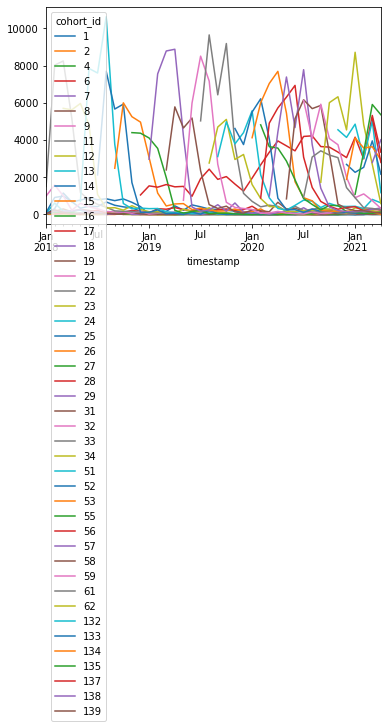

In [24]:
df.groupby('cohort_id').resample('M').size().unstack(0).plot()

In [36]:
# loop through all Programs grouping by program_id and pulling 7 largest path counts
pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nlargest(15))
        print(p_df)

                                                               path
program_id path                                                    
1          index.html                                          1011
           javascript-i                                         736
           html-css                                             542
           spring                                               501
           java-iii                                             479
           java-ii                                              454
           java-i                                               444
           javascript-ii                                        429
           appendix                                             409
           jquery                                               344
           mysql                                                284
           content/html-css                                     262
           javascript-i/introduction/working-wit

- Javascript-i appears to attaract the most counts

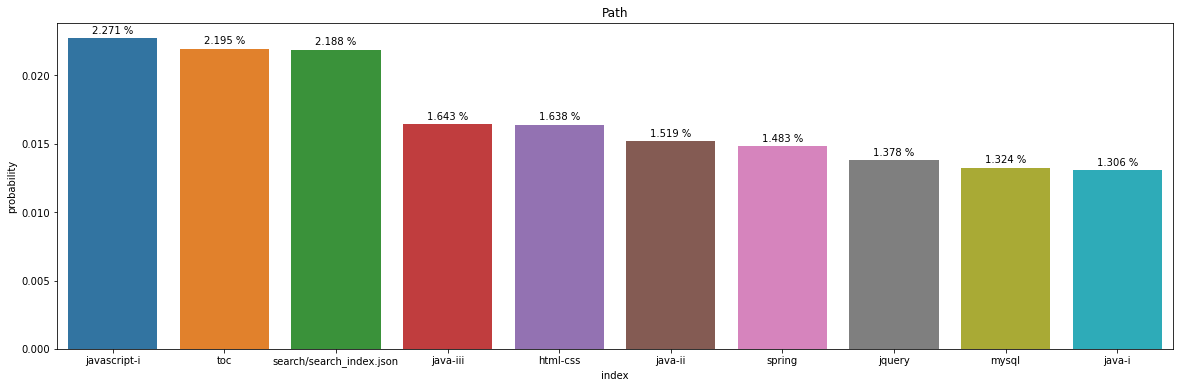

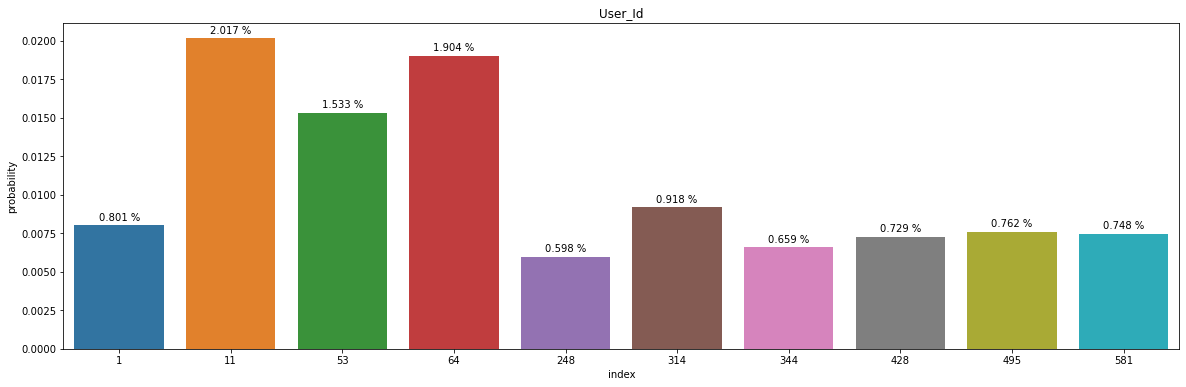

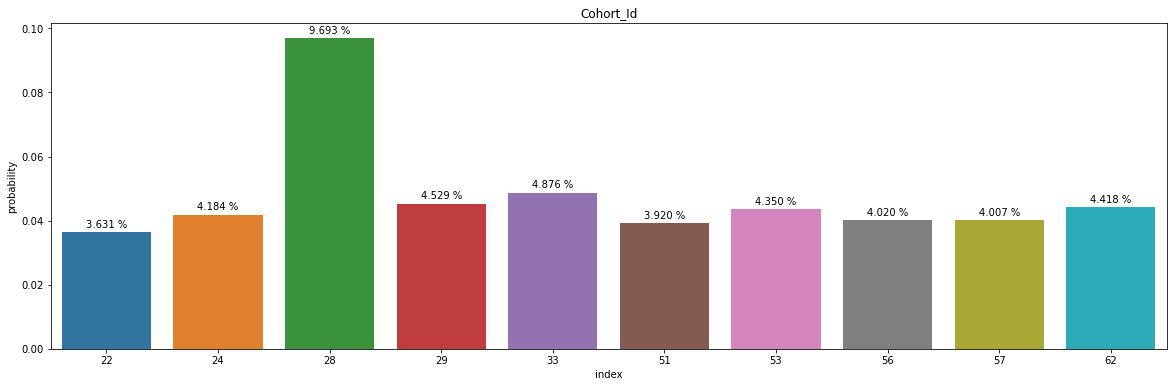

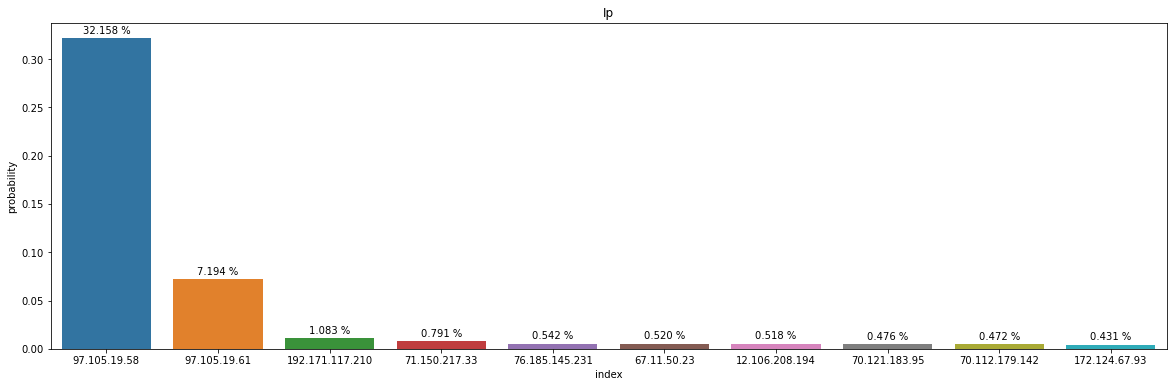

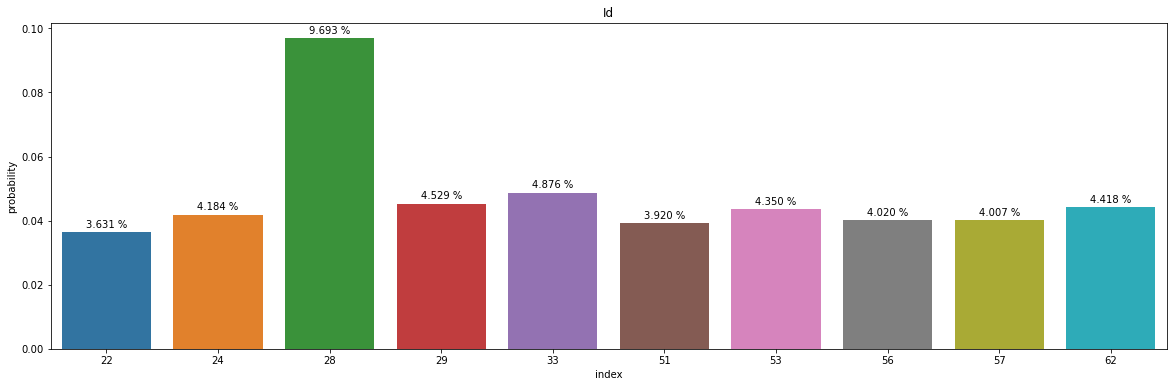

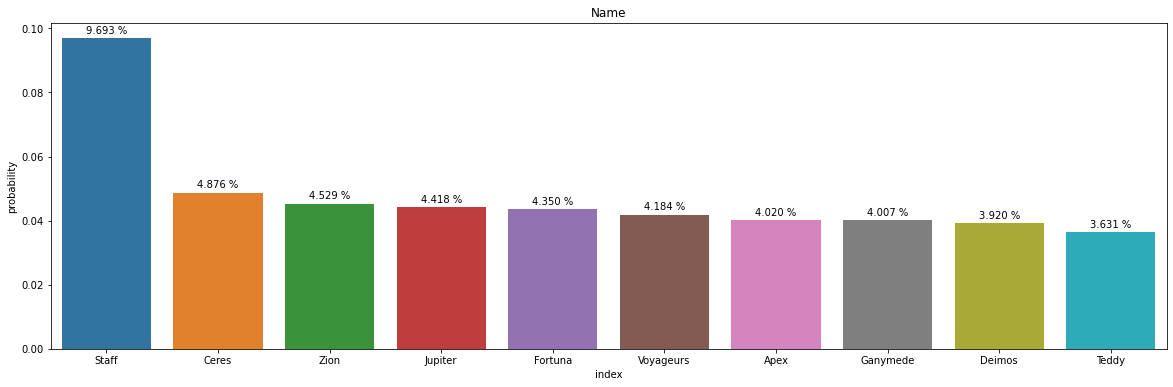

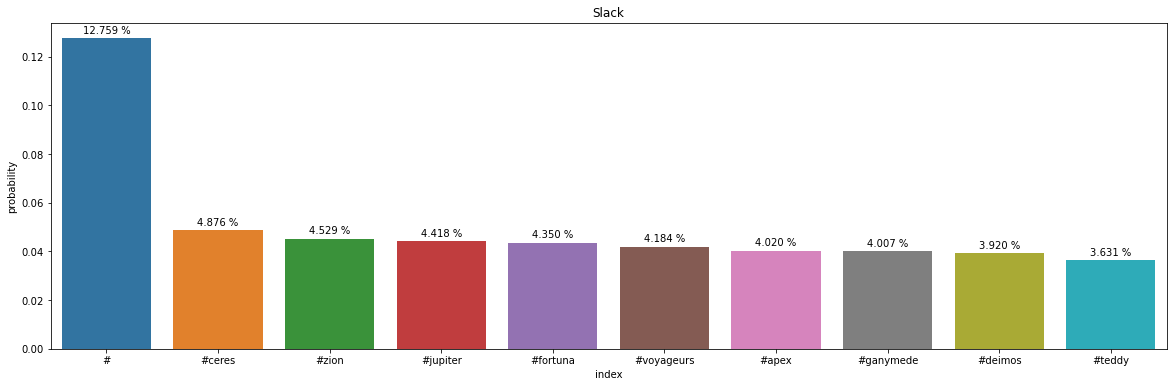

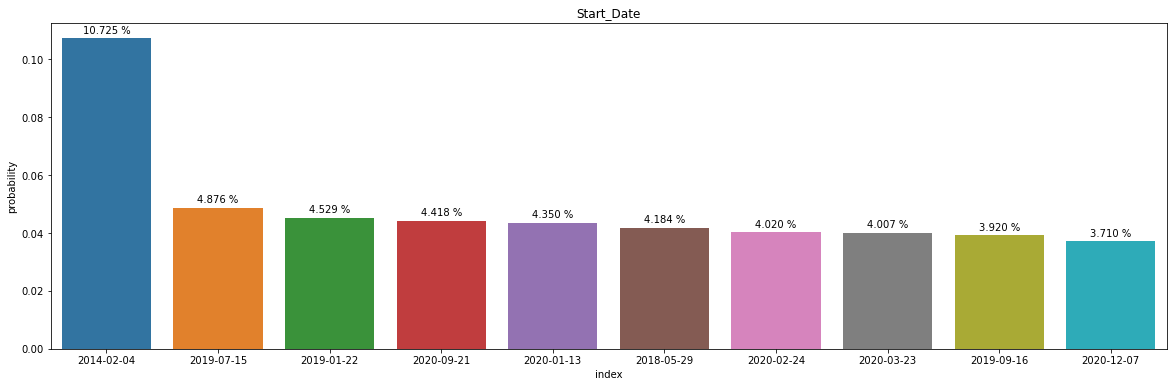

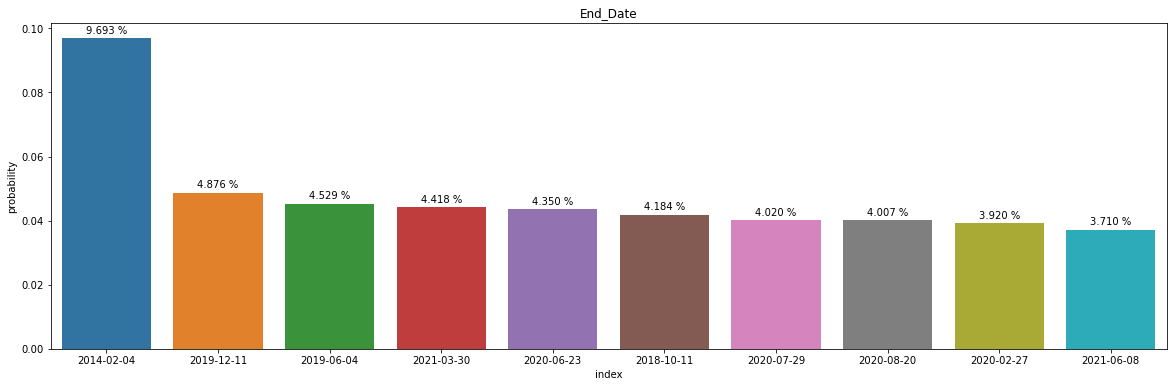

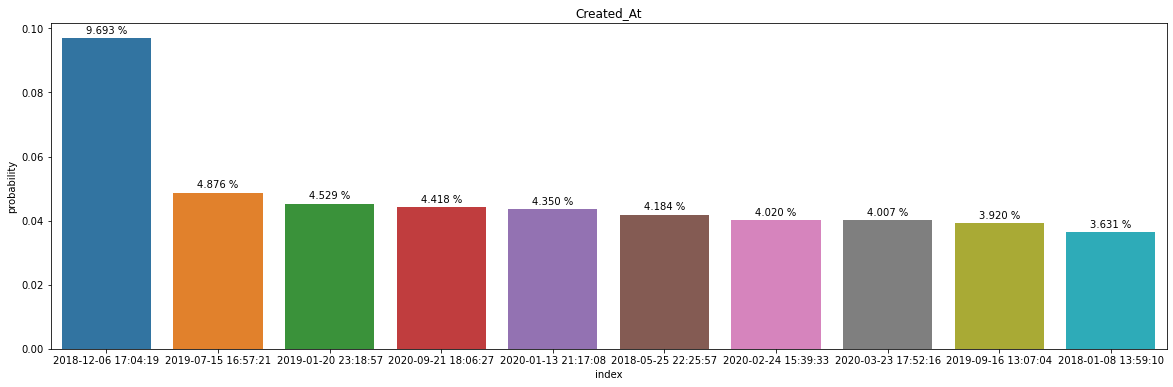

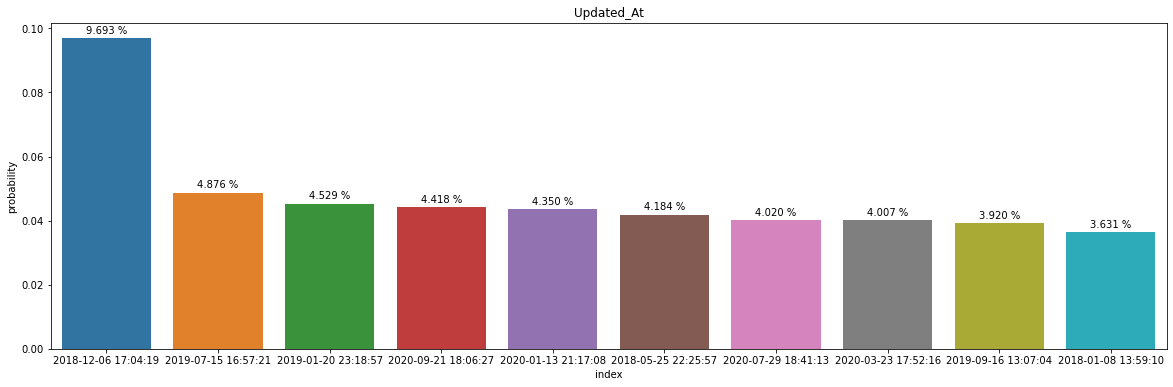

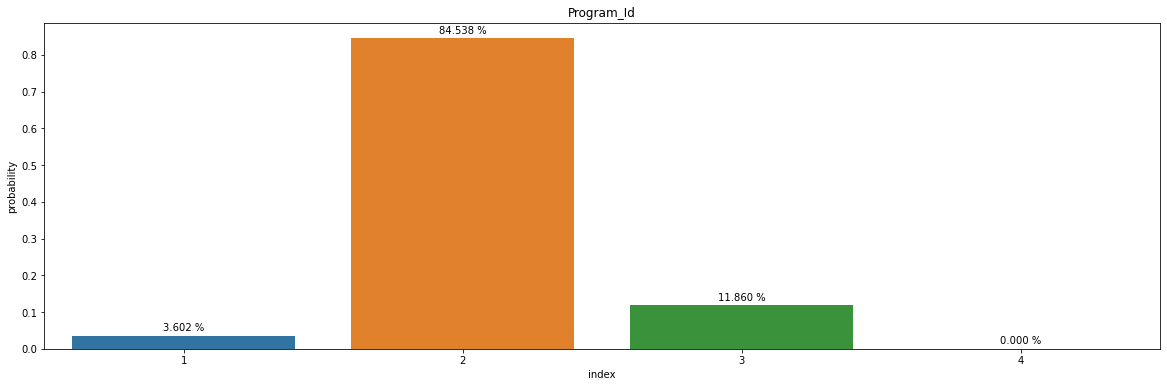

In [14]:
for col in df.columns:
    plt.figure(figsize=(20, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.3f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
   - # loop through all Programs grouping by program_id and pulling 7 largest path counts
pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nlargest(15))
        print(p_df)


2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

pd.set_option('display.max_rows', None)
program_list = [1, 2, 3]

for p in program_list:
        
        prog_df = pd.DataFrame(df).groupby('program_id')['path'].value_counts()
        p_df = prog_df.loc[[p]]
        p_df = pd.DataFrame(p_df.nlargest(15))
        print(p_df)

    
    
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

- maybe run the above code and also graph function
    


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

lets run upper and lower bollinger band on this and go into detail.

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

 Use the time series lesson and put a specific lens on 2019
 def generateBollingerBands(df, ema_lst=[7, 14, 30, 60, 90]):
    '''Pass df with index that's DateTimeIndex and only one continuious column
    '''
    
    result = ''
    col_name = df.columns[0]
    
    def plotFigure(my_df, ema, col_name):
            plt.figure(figsize=(16,8))
            tmp_result = ''
            plt.plot(my_df.index, my_df.rate, label=col_name.title())
            plt.plot(my_df.index, my_df.midband, label=f'{ema}-day EMA/Midband')
            plt.plot(my_df.index, my_df.upper_band, label='Upper Band')
            plt.plot(my_df.index, my_df.lower_band, label='Lower Band')
            plt.legend(loc='best')
            plt.ylabel(col_name.title())
            plt.title(f'{ema} Day Bollinger Band for {col_name.title()}')
            figname = f'images/{ema}_day_bb_plot.png'
            tmp_result += f'#### {ema}-Day Bollinger Band Plot\n\n'
            tmp_result += f"![{ema}_day_bb_{col_name}_plt]({figname} '{ema}_day_bb_{col_name}_image')\n\n"
            plt.savefig(figname)
            plt.show()
            return tmp_result

    for ema in ema_lst: 
        # Calculate Midband
        midband = df.ewm(span=ema).mean()
        stdev = df.ewm(span=ema).std()
        upper_band = midband + stdev * 3
        lower_band = midband - stdev * 3
        bollinger_band = pd.concat([upper_band, lower_band], axis=1)
        bollinger_band.columns = ['upper_band', 'lower_band']
        my_df = pd.concat([df, midband, bollinger_band], axis=1)
        my_df.columns = [col_name, 'midband', 'upper_band', 'lower_band']
        result += plotFigure(my_df, ema, col_name)
    return result
    
    
result = generateBollingerBands(daily_btc_df)

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

 use time series again

7. Which lessons are least accessed?

again use the function and do a groupby


8. Anything else I should be aware of?